# CNN example

In [40]:
# importing the require library

import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import cifar10
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from dataclasses import dataclass


In [41]:
#--------------------------
# Generating seed
# fix seed to make training deterministic
#--------------------------

SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)



In [42]:
#-------------------------------
# Loading the dataset and examine
# Split dataset into train and test
#--------------------------------

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


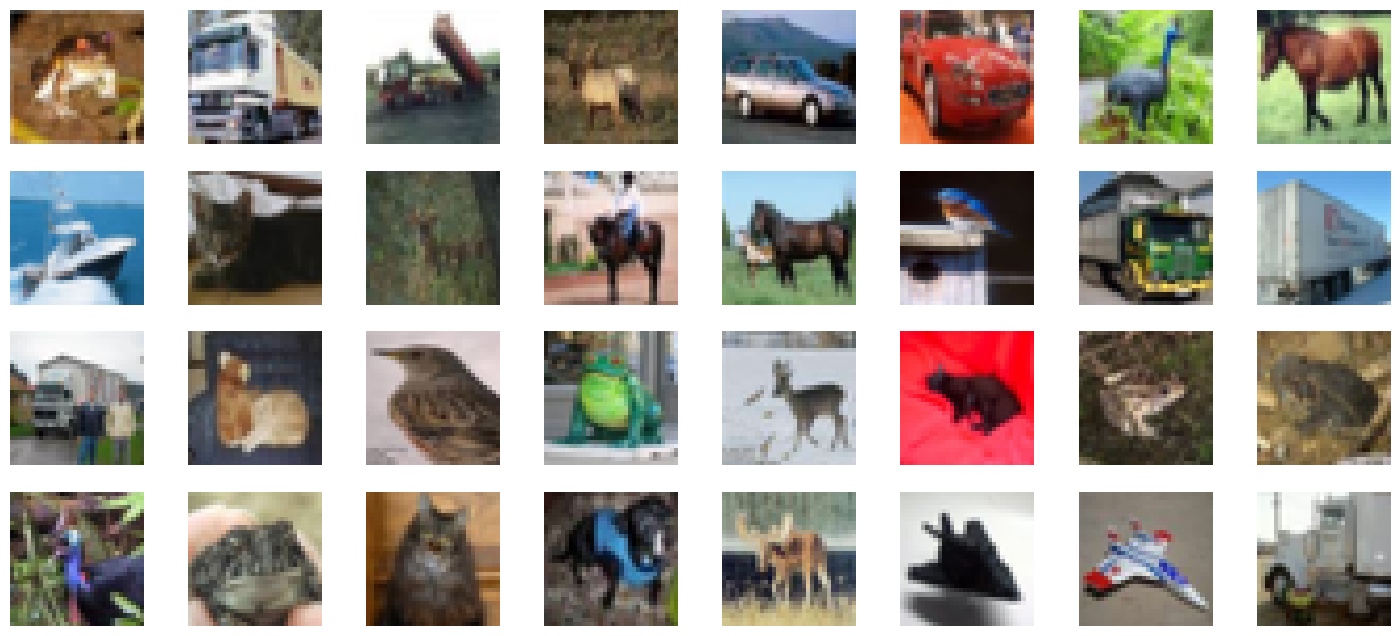

In [43]:
#-------------------------------
# Display the sample image
#-------------------------------

plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_train[i, :,:])
    plt.axis('off')

In [44]:
#--------------------------
#dataset preprosessing
#---------------------------

#Normalize image to the range[0-1]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Change the label from integer to categorical

print('original {integer} label of the first training sample:', y_train[0])

# convert label to one-hot-encoded

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('After one-hot-encoded categorical label of the first training sample:', y_train[0])

original {integer} label of the first training sample: [6]
After one-hot-encoded categorical label of the first training sample: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [45]:
#---------------------------------------
# Dataset and training config parameters
#---------------------------------------

@dataclass(frozen=True)
class Datasetconfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:         int = 31
    BATCH_SIZE:     int = 256
    LEARNING_RATE:  float = 0.001


In [46]:
#-------------------------------------------
# Model for CNN Construction
#-------------------------------------------

def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #----------------------------------------------
    # Conv Block 1: 32 filters, MaxPool.
    #----------------------------------------------

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #----------------------------------------------
    # Conv Block 2: 64 filters, MaxPool.
    #----------------------------------------------

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #----------------------------------------------
    # Conv Block 3: 64 filters, MaxPool.
    #----------------------------------------------

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #----------------------------------------------
    #Flatten the convolution feature
    #----------------------------------------------

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model


In [47]:
#----------------------------------------
# Creating model
#----------------------------------------

model = cnn_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [48]:
#----------------------------
# Compiling the model
#----------------------------

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [49]:
#-------------------------------
# Training the model
#-------------------------------

history = model.fit(
    x_train,
    y_train,
    batch_size = TrainingConfig.BATCH_SIZE,
    epochs = TrainingConfig.EPOCHS,
    verbose = 1,
    validation_split = .3,
)

Epoch 1/31
137/137 [==============================] - 227s 2s/step - loss: 2.1228 - accuracy: 0.2298 - val_loss: 1.8997 - val_accuracy: 0.2854
Epoch 2/31
137/137 [==============================] - 226s 2s/step - loss: 1.7467 - accuracy: 0.3684 - val_loss: 1.5622 - val_accuracy: 0.4282
Epoch 3/31
137/137 [==============================] - 227s 2s/step - loss: 1.5056 - accuracy: 0.4559 - val_loss: 1.3534 - val_accuracy: 0.5047
Epoch 4/31
137/137 [==============================] - 206s 2s/step - loss: 1.3292 - accuracy: 0.5229 - val_loss: 1.2784 - val_accuracy: 0.5381
Epoch 5/31
137/137 [==============================] - 206s 2s/step - loss: 1.1837 - accuracy: 0.5765 - val_loss: 1.2700 - val_accuracy: 0.5506
Epoch 6/31
137/137 [==============================] - 228s 2s/step - loss: 1.0559 - accuracy: 0.6237 - val_loss: 1.0935 - val_accuracy: 0.6115
Epoch 7/31
137/137 [==============================] - 225s 2s/step - loss: 0.9449 - accuracy: 0.6676 - val_loss: 0.9794 - val_accuracy: 0.6594

In [53]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15,4))

    if not ( isinstance(metric_name, list) or isintance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(0, TrainingConfig.EPOCHS - 1)
    plt.ylim(ylim)

    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(MultipleLocator(1))

    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()


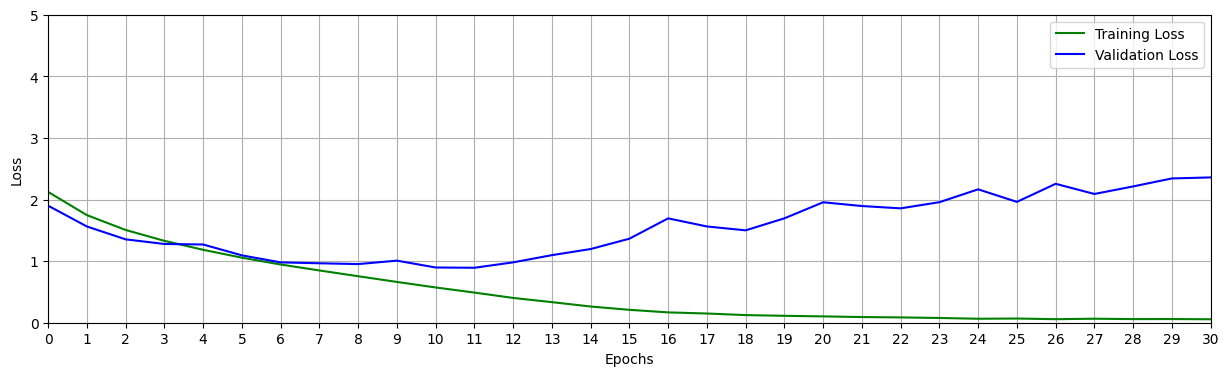

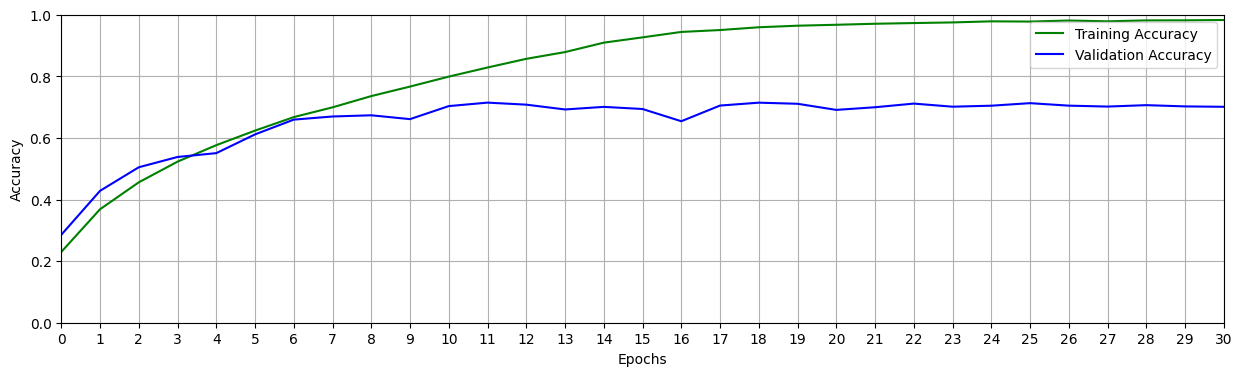

In [56]:
# Retrieve training result

train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc  = history.history['val_accuracy']

plot_results(
    [train_loss, valid_loss],
    ylabel='Loss',
    ylim=[0.0, 5.0],
    metric_name=['Training Loss', 'Validation Loss'],
    color=['g', 'b'],
)

plot_results(
    [train_acc, valid_acc],
    ylabel='Accuracy',
    ylim=[0.0, 1.0],
    metric_name=['Training Accuracy', 'Validation Accuracy'],
    color=['g', 'b'],
)

# The model  from the graph  is clearly overfitting. So we need to optimized this by adding Dropout in the CNN layer, we need to rebuild our model

In [58]:
#-------------------------------------------
# Model for CNN Construction Dropout
#-------------------------------------------

def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()

    #----------------------------------------------
    # Conv Block 1: 32 filters, MaxPool.
    #----------------------------------------------

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) # adding dropout in our cnn layer for 25%

    #----------------------------------------------
    # Conv Block 2: 64 filters, MaxPool.
    #----------------------------------------------

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) # adding dropout in our cnn layer for 25%

    #----------------------------------------------
    # Conv Block 3: 64 filters, MaxPool.
    #----------------------------------------------

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) # adding dropout in our cnn layer for 25%

    #----------------------------------------------
    #Flatten the convolution feature
    #----------------------------------------------

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.50)) # adding dropout in our cnn layer for 50%
    model.add(Dense(10, activation='softmax'))

    return model


In [62]:
#----------------------------------------
# Creating model
#----------------------------------------

dropout_model = cnn_model_dropout()
dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [63]:
#--------------------------------
# compile the new model
#--------------------------------

dropout_model.compile(
    optimizer = 'rmsprop',
    loss      = 'categorical_crossentropy',
    metrics   =  ['accuracy'],
)

In [66]:
history = dropout_model.fit(
    x_train,
    y_train,
    batch_size       = TrainingConfig.BATCH_SIZE,
    epochs           = TrainingConfig.EPOCHS,
    verbose          = 1,
    validation_split = .3,
)

Epoch 1/31
137/137 [==============================] - 232s 2s/step - loss: 2.1021 - accuracy: 0.2275 - val_loss: 1.8408 - val_accuracy: 0.3429
Epoch 2/31
137/137 [==============================] - 230s 2s/step - loss: 1.7934 - accuracy: 0.3485 - val_loss: 1.5636 - val_accuracy: 0.4276
Epoch 3/31
137/137 [==============================] - 209s 2s/step - loss: 1.6007 - accuracy: 0.4178 - val_loss: 1.4388 - val_accuracy: 0.4708
Epoch 4/31
137/137 [==============================] - 230s 2s/step - loss: 1.4769 - accuracy: 0.4642 - val_loss: 1.4508 - val_accuracy: 0.4770
Epoch 5/31
137/137 [==============================] - 230s 2s/step - loss: 1.3720 - accuracy: 0.5061 - val_loss: 1.2846 - val_accuracy: 0.5331
Epoch 6/31
137/137 [==============================] - 210s 2s/step - loss: 1.2627 - accuracy: 0.5483 - val_loss: 1.2999 - val_accuracy: 0.5317
Epoch 7/31
137/137 [==============================] - 230s 2s/step - loss: 1.1811 - accuracy: 0.5765 - val_loss: 1.0982 - val_accuracy: 0.6077

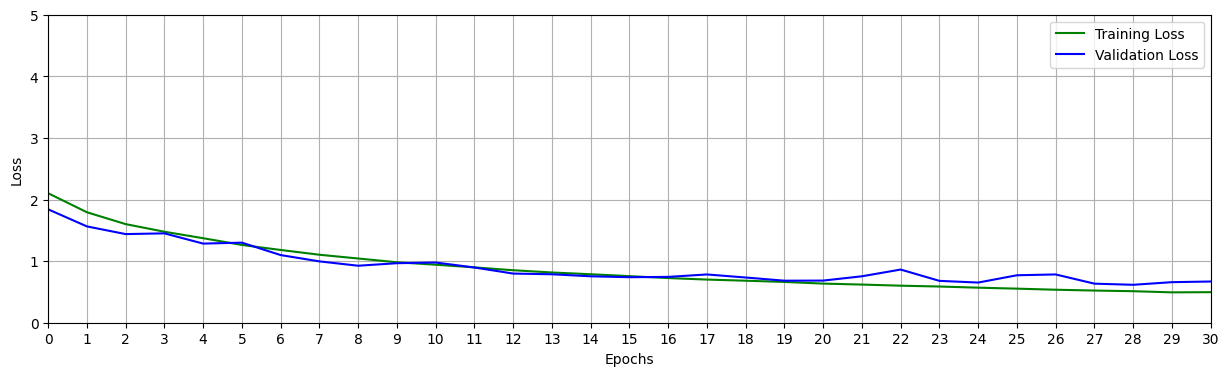

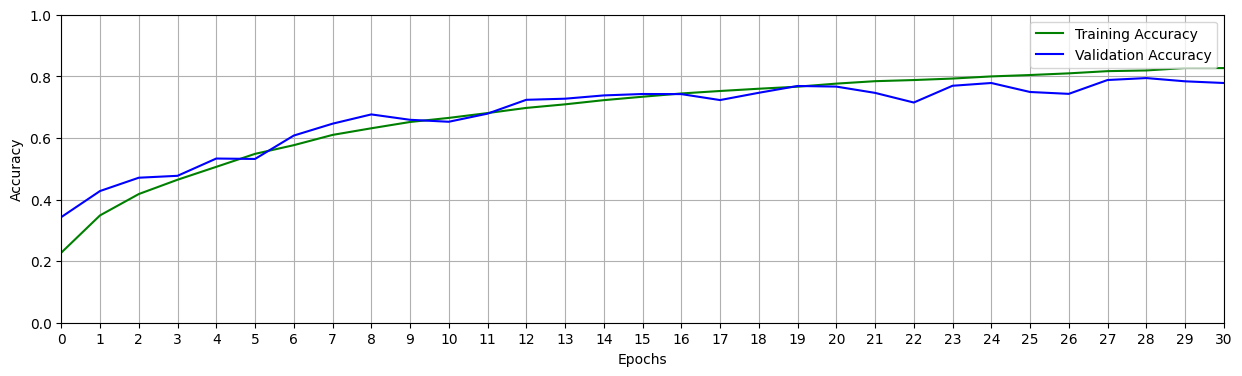

In [67]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)



In [71]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
dropout_model.save("dataset_from_cifar10")

In [72]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('dataset_from_cifar10')


In [74]:
test_loss, test_acc = reloaded_model_dropout.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 15s 49ms/step - loss: 0.6903 - accuracy: 0.7685
Test accuracy: 76.850


In [75]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 [==============================] - 0s 182ms/step
Prediction accuracy:  0.88


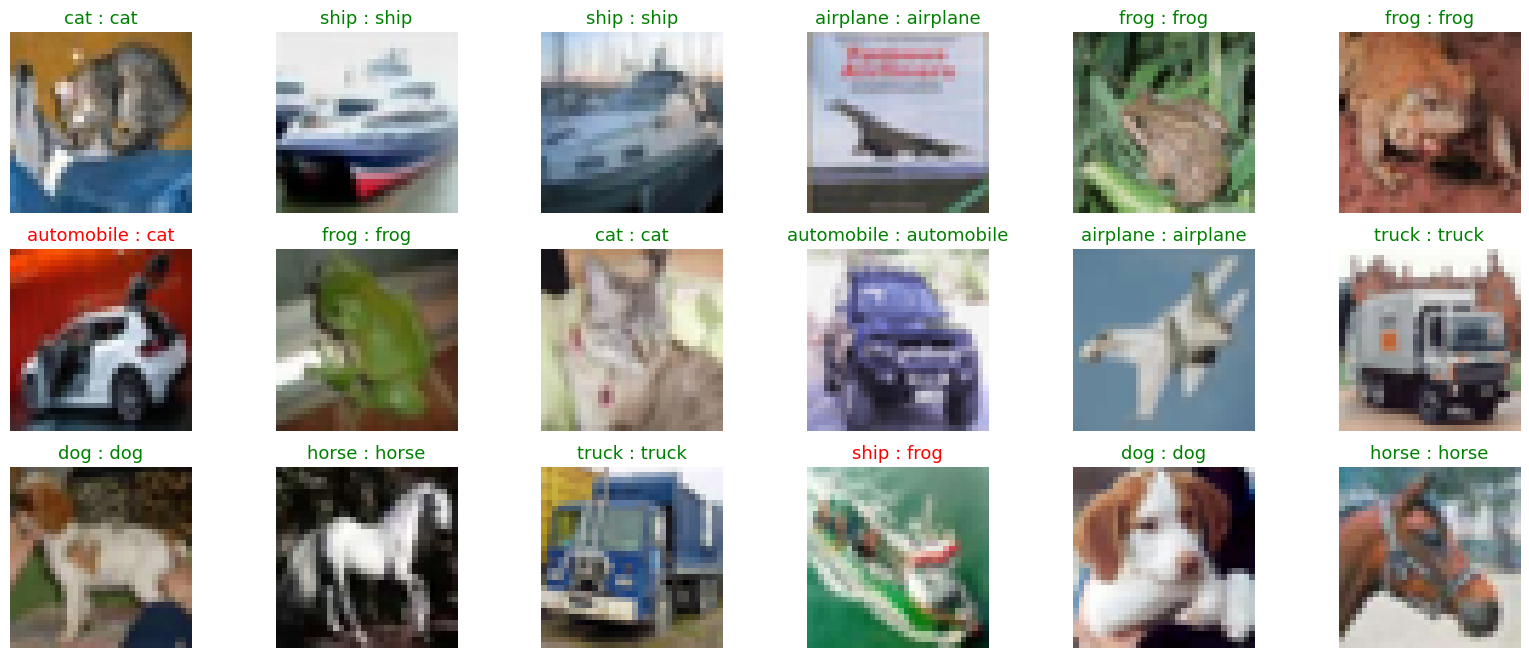

In [76]:
evaluate_model(x_test, reloaded_model_dropout)

In [78]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(x_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 15s 48ms/step


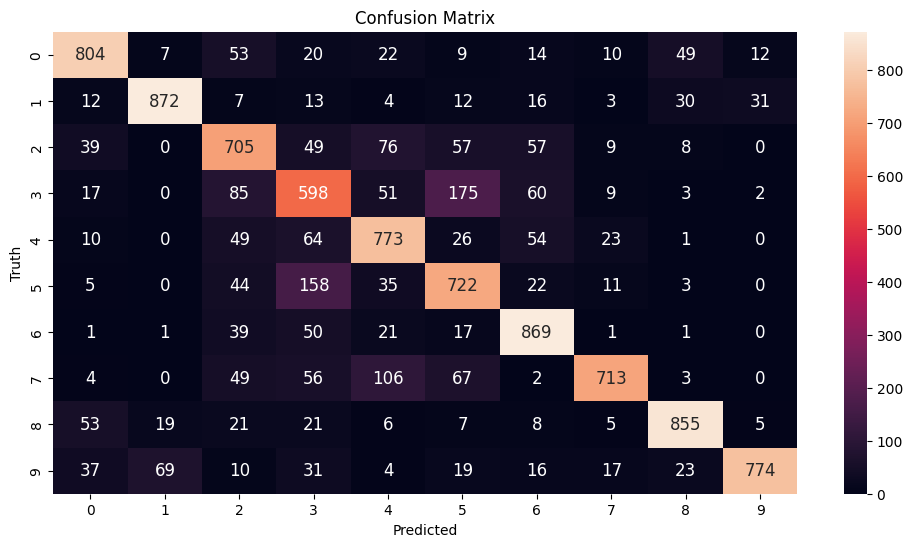

In [79]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[12, 6])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [1]:
!wget https://drive.google.com/drive/folders/1UtHJ-lcCXzYr3Rt27Keyh-_L2GCIKWzQ?usp=drive_link

--2023-09-26 12:32:26--  https://drive.google.com/drive/folders/1UtHJ-lcCXzYr3Rt27Keyh-_L2GCIKWzQ?usp=drive_link
Resolving drive.google.com (drive.google.com)... 142.251.111.100, 142.251.111.102, 142.251.111.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/folders/1UtHJ-lcCXzYr3Rt27Keyh-_L2GCIKWzQ?usp%3Ddrive_link&followup=https://drive.google.com/drive/folders/1UtHJ-lcCXzYr3Rt27Keyh-_L2GCIKWzQ?usp%3Ddrive_link [following]
--2023-09-26 12:32:26--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/folders/1UtHJ-lcCXzYr3Rt27Keyh-_L2GCIKWzQ?usp%3Ddrive_link&followup=https://drive.google.com/drive/folders/1UtHJ-lcCXzYr3Rt27Keyh-_L2GCIKWzQ?usp%3Ddrive_link
Resolving accounts.google.com (accounts.google.com)